<a href="https://colab.research.google.com/github/lferodrigues/Metrado-CC-UFJF/blob/main/Ex01_gorjeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logica Fuzzy com python: O guia para iniciantes: Exemplo das gorjetas**

**Antecendentes (entradas)**

Serviço: que nota voce daria para o serviço, em uma escala de 0 a 10?

      *  Ruim, aceitavel, otimo
Qualidade da comida: quao boa estava a comida, em uma escala de 0 a 10?
  
      *   Ruim,Boa,Saborosa

**Consequentes(saidas)**
Gorjetas: quanta gorgeta você daria, entre 0% a 20%?

    * baixa,média,alta

Regras


*   Se a qualidade da comida for ruim ou serviço for ruim entao a gorjeta sera baixa
*   Se o serviço for médio então a gorjeta será média

*   Se o serviço for bom e a qualidade da comida for saborosa entao a gorjeta sera alta









**Instalação das bibliotecas**

In [ ]:
pip install scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

**Antecedentes e consequentes**

In [5]:
qualidade = ctrl.Antecedent(np.arange(0,11,1),'qualidade')
servico = ctrl.Antecedent(np.arange(0,11,1),'servico')

In [8]:
gorjeta = ctrl.Consequent(np.arange(0,21,1),'gorjeta')

**Membership functions**

In [10]:
qualidade.automf(number= 3, names = ['ruim','boa','saborosa'])
servico.automf(number = 3, names = ['ruim','aceitável','ótimo'])

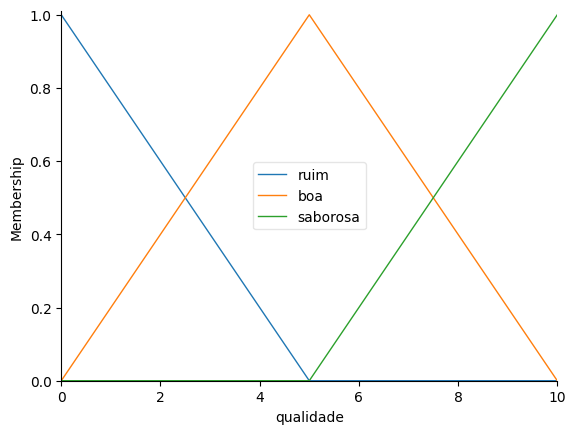

In [12]:
qualidade.view()

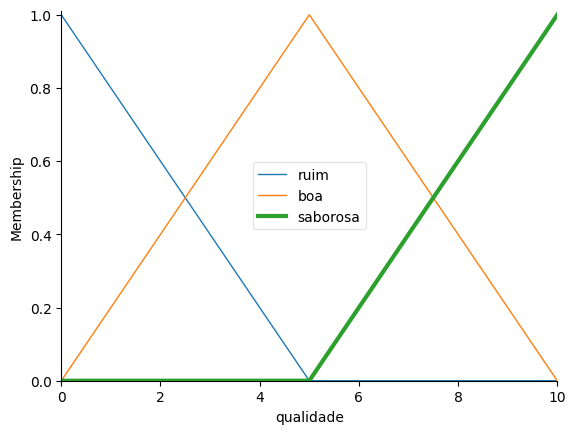

In [13]:
qualidade['saborosa'].view()

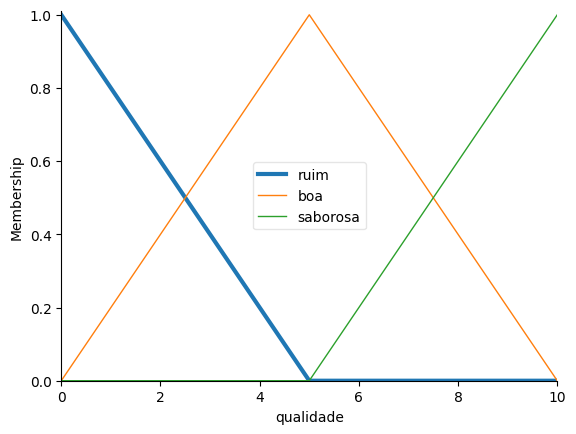

In [14]:
qualidade['ruim'].view()

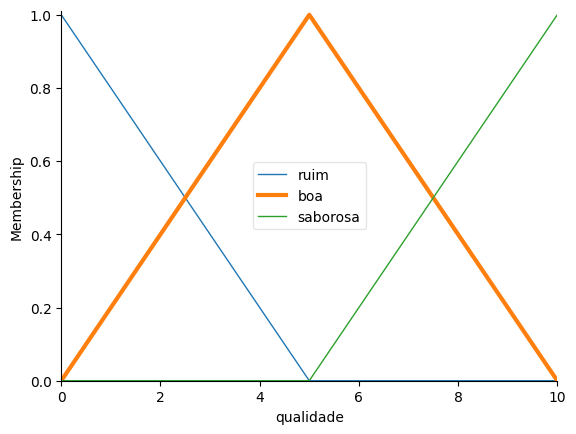

In [15]:
qualidade['boa'].view()

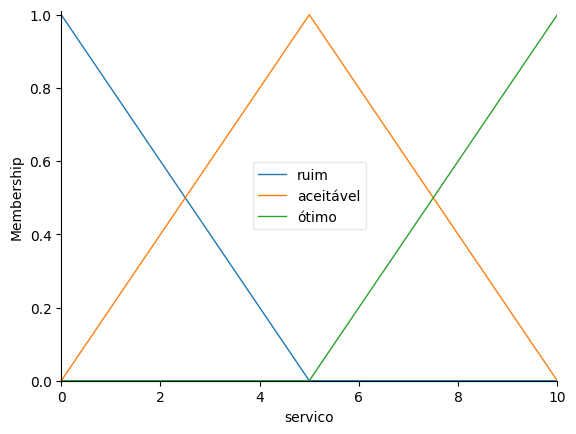

In [16]:
servico.view()